# 3 Visualization and export of data

To run mayavi in jupyter notebook, we'll need to run: 

In [1]:
%gui qt

In [2]:
import sys
sys.path.append('..')

from agrid.grid import Grid
from agrid.acc import download, quick_look_netcdf

We stick to the same Antarctic example as before: 

In [3]:
km = 1000

ant = Grid(crs=3031, res = [10*km, 10*km], 
           left = -3100*km, up=3100*km, right = 3100*km, down = -3100*km)

We download and extract some data: 

In [4]:
download('http://www.seismolab.org/model/antarctica/lithosphere/AN1-HF.tar.gz', 
                  '../data/an/AN1-HF.tar.gz')


download('http://www.seismolab.org/model/antarctica/lithosphere/AN1-S_depth_grd.tar.gz', 
                  '../data/an/AN1-S/AN1-S_depth_grd.tar.gz')

Content:  application/x-gzip


6.63kKB [00:47, 140KB/s]                            


Content:  application/x-gzip


5.04kKB [00:35, 141KB/s]                           


['AN1-S_hslice_000.0.grd',
 'AN1-S_hslice_002.5.grd',
 'AN1-S_hslice_005.0.grd',
 'AN1-S_hslice_007.5.grd',
 'AN1-S_hslice_010.0.grd',
 'AN1-S_hslice_012.5.grd',
 'AN1-S_hslice_015.0.grd',
 'AN1-S_hslice_017.5.grd',
 'AN1-S_hslice_020.0.grd',
 'AN1-S_hslice_025.0.grd',
 'AN1-S_hslice_030.0.grd',
 'AN1-S_hslice_035.0.grd',
 'AN1-S_hslice_040.0.grd',
 'AN1-S_hslice_045.0.grd',
 'AN1-S_hslice_050.0.grd',
 'AN1-S_hslice_055.0.grd',
 'AN1-S_hslice_060.0.grd',
 'AN1-S_hslice_065.0.grd',
 'AN1-S_hslice_070.0.grd',
 'AN1-S_hslice_075.0.grd',
 'AN1-S_hslice_080.0.grd',
 'AN1-S_hslice_085.0.grd',
 'AN1-S_hslice_090.0.grd',
 'AN1-S_hslice_095.0.grd',
 'AN1-S_hslice_100.0.grd',
 'AN1-S_hslice_105.0.grd',
 'AN1-S_hslice_110.0.grd',
 'AN1-S_hslice_115.0.grd',
 'AN1-S_hslice_120.0.grd',
 'AN1-S_hslice_125.0.grd',
 'AN1-S_hslice_130.0.grd',
 'AN1-S_hslice_135.0.grd',
 'AN1-S_hslice_140.0.grd',
 'AN1-S_hslice_145.0.grd',
 'AN1-S_hslice_150.0.grd',
 'AN1-S_hslice_155.0.grd',
 'AN1-S_hslice_160.0.grd',
 

We can have a quick look: 

<xarray.Dataset>
Dimensions:  (lat: 451, lon: 5401)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... -60.13 -60.07 -60.0
Data variables:
    z        (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        region_mask.grd
    history:      grdcut -R-180/180/-90/-60 ../heatflux_proposed_final.grd -G...
    GMT_version:  4.5.3 [64-bit]


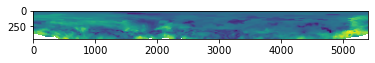

<xarray.DataArray 'z' (lat: 451, lon: 5401)>
array([[52.807697, 52.807697, 52.807697, ..., 52.807697, 52.807697, 52.807697],
       [52.84437 , 52.84437 , 52.84437 , ..., 52.84437 , 52.84437 , 52.84437 ],
       [52.881042, 52.881042, 52.881042, ..., 52.881042, 52.881042, 52.881042],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Coordinates:
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * lat      (lat) float64 -90.0 -89.93 -89.87 -89.8 ... -60.13 -60.07 -60.0
Attributes:
    long_name:     z
    actual_range:  [ 26.51891518 102.41247559]


9790908

In [9]:
quick_look_netcdf('../local/data/an/AN1-HF.grd')


Data with right number of dimensions can be imported directely. Every cell is interpolated, so this mighttake some time: 

In [10]:
ant.ds['HF'] = (('Y', 'X'), ant.read_grid('../local/data/an/AN1-HF.grd', xyz = ('lon','lat','z') )) #Default crs is epsg:4326

We got a 3D model in the shape of a number of GMT .grd files. They are essentially netCDF format, but need to be placed in a 3D fram. We hardcode this: 

<xarray.Dataset>
Dimensions:  (x: 451, y: 83)
Coordinates:
  * x        (x) float64 -180.0 -179.2 -178.4 -177.6 ... 177.6 178.4 179.2 180.0
  * y        (y) float64 -90.0 -89.2 -88.39 -87.59 ... -26.41 -25.61 -24.8 -24.0
Data variables:
    z        (y, x) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        hslice_aVs_solution_dsp_ref3d_h20_v30_b100_Moho25_cut50_35.grd
    history:      xyz2grd -R-180/180/-90/-24 -I0.8 a13.pole -Ghslice_aVs_solu...
    GMT_version:  4.5.3 [64-bit]


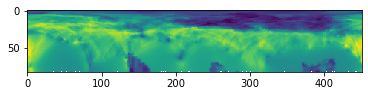

<xarray.DataArray 'z' (y: 83, x: 451)>
array([[3.85937 , 3.85937 , 3.85937 , ..., 3.85937 , 3.85937 , 3.85937 ],
       [3.996017, 3.996017, 3.996017, ..., 3.996017, 3.996017, 3.996017],
       [3.980735, 3.980735, 3.980735, ..., 3.980735, 3.980735, 3.980735],
       ...,
       [4.54324 , 4.586309, 4.664282, ..., 4.459468, 4.496047, 4.54324 ],
       [4.545171, 4.592638, 4.667985, ..., 4.459203, 4.497708, 4.545171],
       [4.528532, 4.59424 , 4.673768, ..., 4.461239, 4.501483, 4.528532]],
      dtype=float32)
Coordinates:
  * x        (x) float64 -180.0 -179.2 -178.4 -177.6 ... 177.6 178.4 179.2 180.0
  * y        (y) float64 -90.0 -89.2 -88.39 -87.59 ... -26.41 -25.61 -24.8 -24.0
Attributes:
    long_name:     z
    actual_range:  [3.51475954 5.0052495 ]


154696

In [11]:
quick_look_netcdf('../local/data/an/AN1-S/AN1-S_hslice_035.0.grd')

We make a list$^1$ of files and associate depths from filenames:  

---
1. This is an option `bulk = True` in next version. 

In [14]:
import glob, os
import numpy as np

an_files = sorted(glob.glob('../local/data/an/AN1-S/*.grd'))
#print(an_files)
ant.ds.coords['AN_Z'] = [np.float32(d[-9:-4])*km for d in an_files]
str_depths = [str(d[-9:-4]) for d in an_files]

print(ant.ds.coords['AN_Z'])

an_array = np.empty((ant.nx, ant.ny, len(an_files)))
an_array[:] = np.nan
for i, a in enumerate(ant.ds.coords['AN_Z'].values):
    print(a//km, end=', ')
    fname = '../data/an/AN1-S/AN1-S_hslice_%s.grd'%str_depths[i]
    if os.path.isfile(fname):
        an_array[:,:,i] = ant.read_grid(fname, xyz = ('x','y','z') ) 
    
ant.ds['AN_S'] = (('Y', 'X', 'AN_Z'), an_array)



<xarray.DataArray 'AN_Z' (AN_Z: 51)>
array([     0.,   2500.,   5000.,   7500.,  10000.,  12500.,  15000.,  17500.,
        20000.,  25000.,  30000.,  35000.,  40000.,  45000.,  50000.,  55000.,
        60000.,  65000.,  70000.,  75000.,  80000.,  85000.,  90000.,  95000.,
       100000., 105000., 110000., 115000., 120000., 125000., 130000., 135000.,
       140000., 145000., 150000., 155000., 160000., 165000., 170000., 180000.,
       190000., 200000., 210000., 220000., 230000., 240000., 250000., 275000.,
       300000., 325000., 350000.])
Coordinates:
  * AN_Z     (AN_Z) float64 0.0 2.5e+03 5e+03 7.5e+03 ... 3e+05 3.25e+05 3.5e+05
-0.0, 2.0, 5.0, 7.0, 10.0, 12.0, 15.0, 17.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0, 100.0, 105.0, 110.0, 115.0, 120.0, 125.0, 130.0, 135.0, 140.0, 145.0, 150.0, 155.0, 160.0, 165.0, 170.0, 180.0, 190.0, 200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 275.0, 300.0, 325.0, 350.0, 

This might be a good time to save the grid: 

In [15]:
! mkdir ../local/grids/ -p
import pickle
pickle.dump(ant, open('../local/grids/ant.p', "wb" ))

#ant = None

#Or load: 
ant = pickle.load( open('../local/grids/ant.p', "rb" ) )

We have already seen some option to look at the data. 

../agrid/grid.py:1105: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  epsg=basemap_epsg, **kwargs)


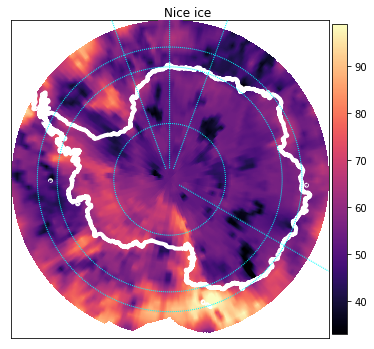

In [16]:
ant.map_grid('HF', cmap='magma', cbar=True, title='Nice ice', 
             par=[-66.563, -70, -80], mer = [-20, 0, 20, 120], 
            line_c = 'white', line_grid_c = 'cyan', line_w=4, 
            circ_map=True, figsize=(5,5))

Some basic 3D viz: 


In [ ]:
ant.oblique_view('HF', 
    save_name = '../local/oblique_hf.png',
    vmin= 30, vmax=100, 
    cmap='magma',
    warp_scale=2, 
    distance=1300,
    azimuth=180,
    roll=-90)

! open ../local/oblique_hf.png

We ran `%gui qt` and hince we can call mayavi to display the figure from Jupyter Notebook. Scene opens in new window. (Warning: This is not always so smooth with Jupyter.)

In [ ]:
ant.oblique_view('HF', 
    show=True,
    vmin= 30, vmax=100, 
    cmap='magma',
    warp_scale=2, 
    distance=1300,
    azimuth=180,
    roll=-90)

We try Bokeh$^1$ for an interactive app that can be inbedded in e.g. Jupyter Notebook: 

---
1. To be moved to a subpackage in next version. 


In [ ]:
ant.slider('AN_S')

In [ ]:
A = ant.map_grid('HF', show_map=False)
B = ant.map_grid('lat', show_map=False)
#C = ant.map_grid('lon', show_map=False)